In [1]:
#hide
options(jupyter.plot_scale = 3)
options(jupyter.display_mimetypes = c("text/html"))
options(jupyter.rich_display=FALSE)
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=300)
options(max.print=1000)

# "R : list"
> "전북대학교 R입문 10주차 필기"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Introduction to R]
- image: images/r_logo.PNG

In [2]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# list

In [3]:
lst = list(5:10, c("A","B","C"), matrix(c(T,T,F,T),ncol=2))
lst

[[1]]
[1]  5  6  7  8  9 10

[[2]]
[1] "A" "B" "C"

[[3]]
     [,1]  [,2]
[1,] TRUE FALSE
[2,] TRUE  TRUE


In [4]:
lst[[1]]

[1]  5  6  7  8  9 10

In [5]:
lst[[2]]

[1] "A" "B" "C"

In [6]:
lst[[3]]

     [,1] [,2] 
[1,] TRUE FALSE
[2,] TRUE  TRUE

In [7]:
lst[[1]] + 4

[1]  9 10 11 12 13 14

In [8]:
length(lst)

[1] 3

## 왜 쓰는가?

- 함수에서 여러개의 리턴값

- 자료의 저장 및 정리

---

In [9]:
mid = list(c('hynn', 'iu', 'gd'), c(100,95,100))
mid

[[1]]
[1] "hynn" "iu"   "gd"  

[[2]]
[1] 100  95 100


In [10]:
names(mid)

NULL

In [11]:
names(mid) = c('names', 'score')
mid

$names
[1] "hynn" "iu"   "gd"  

$score
[1] 100  95 100


In [12]:
names(mid)

[1] "names" "score"

In [13]:
mid$names

[1] "hynn" "iu"   "gd"  

In [14]:
mid$score

[1] 100  95 100

In [15]:
final = mid
final$score = mid$score - 10
final

$names
[1] "hynn" "iu"   "gd"  

$score
[1] 90 85 90


In [16]:
IR2021 = list(mid, final)
IR2021

[[1]]
[[1]]$names
[1] "hynn" "iu"   "gd"  

[[1]]$score
[1] 100  95 100


[[2]]
[[2]]$names
[1] "hynn" "iu"   "gd"  

[[2]]$score
[1] 90 85 90



In [17]:
names(IR2021) = c("mid", "final")
IR2021

$mid
$mid$names
[1] "hynn" "iu"   "gd"  

$mid$score
[1] 100  95 100


$final
$final$names
[1] "hynn" "iu"   "gd"  

$final$score
[1] 90 85 90



In [18]:
IR2021$final$score

[1] 90 85 90

- 아래와 같이 선언하는 것도 깔끔하다.

In [19]:
IR2021 = list(names = mid$names, mid = mid$score, final = final$score)
IR2021

$names
[1] "hynn" "iu"   "gd"  

$mid
[1] 100  95 100

$final
[1] 90 85 90


# 리스트의 서브세팅

In [20]:
IR2021

$names
[1] "hynn" "iu"   "gd"  

$mid
[1] 100  95 100

$final
[1] 90 85 90


## 첫 번째 방법 : [

- `[`를 이용: 리스트를 리턴

In [21]:
IR2021[1]

$names
[1] "hynn" "iu"   "gd"  


In [22]:
IR2021[1:2]

$names
[1] "hynn" "iu"   "gd"  

$mid
[1] 100  95 100


In [23]:
IR2021[c(1,3)]

$names
[1] "hynn" "iu"   "gd"  

$final
[1] 90 85 90


## 두 번째 방법 : [[

- `[[`를 이용: 리스트의 요소를 리턴

In [24]:
IR2021[[1]]

[1] "hynn" "iu"   "gd"  

In [25]:
IR2021[[2]]

[1] 100  95 100

 `[['names']]`와 같은 사용도 가능하다.

In [26]:
IR2021[['names']]

[1] "hynn" "iu"   "gd"  

### 주의점

In [27]:
IR2021[[1:2]]

[1] "iu"

In [28]:
IR2021[[c(1,2)]]

[1] "iu"

- 위 코드는 IR2021[[1]][2]와 같다.

In [29]:
IR2021[[1:3]]

ERROR: Error in IR2021[[1:3]]: recursive indexing failed at level 2



## 세 번째 방법 : $

- `$`를 이용:

In [30]:
IR2021$names

[1] "hynn" "iu"   "gd"  

### partial matching

In [31]:
IR2021$n

[1] "hynn" "iu"   "gd"  

In [32]:
IR2021$na

[1] "hynn" "iu"   "gd"  

IR201$names

# 리스트의 활용

## 함수의 다중 리턴

In [33]:
cal = function(x, y){
    return(list(add=x+y, sub=x-y, mul=x*y, dic=x/y))
}

cal(2,3)

$add
[1] 5

$sub
[1] -1

$mul
[1] 6

$dic
[1] 0.6666667


- 함수의 결괏값을 저장하여 아래와 같이 사용

In [34]:
rslt = cal(4,3)

In [35]:
rslt$add

[1] 7

In [36]:
rslt$sub

[1] 1

- 아래와 같은 코드는 비효율적이므로 잘 사용하지 않는다.

In [37]:
cal(4,3)$add

[1] 7

In [38]:
cal(4,3)$sub

[1] 1

# 과제

## rnorm(N)

- `rnorm(N, mean = A, sd = B)`을 실행하면 **평균이 A, 표준편차가 B**인 정규분포에서 N개의 난수를 추출하여 벡터 형식으로 리턴한다.

- **mean**과 **sd**를 생략하면 표준정규분포를 사용한다.

In [153]:
st_norm = function(x){
    return ((sqrt(1/(2*pi))) * (exp(-(x**2)/2)))
}

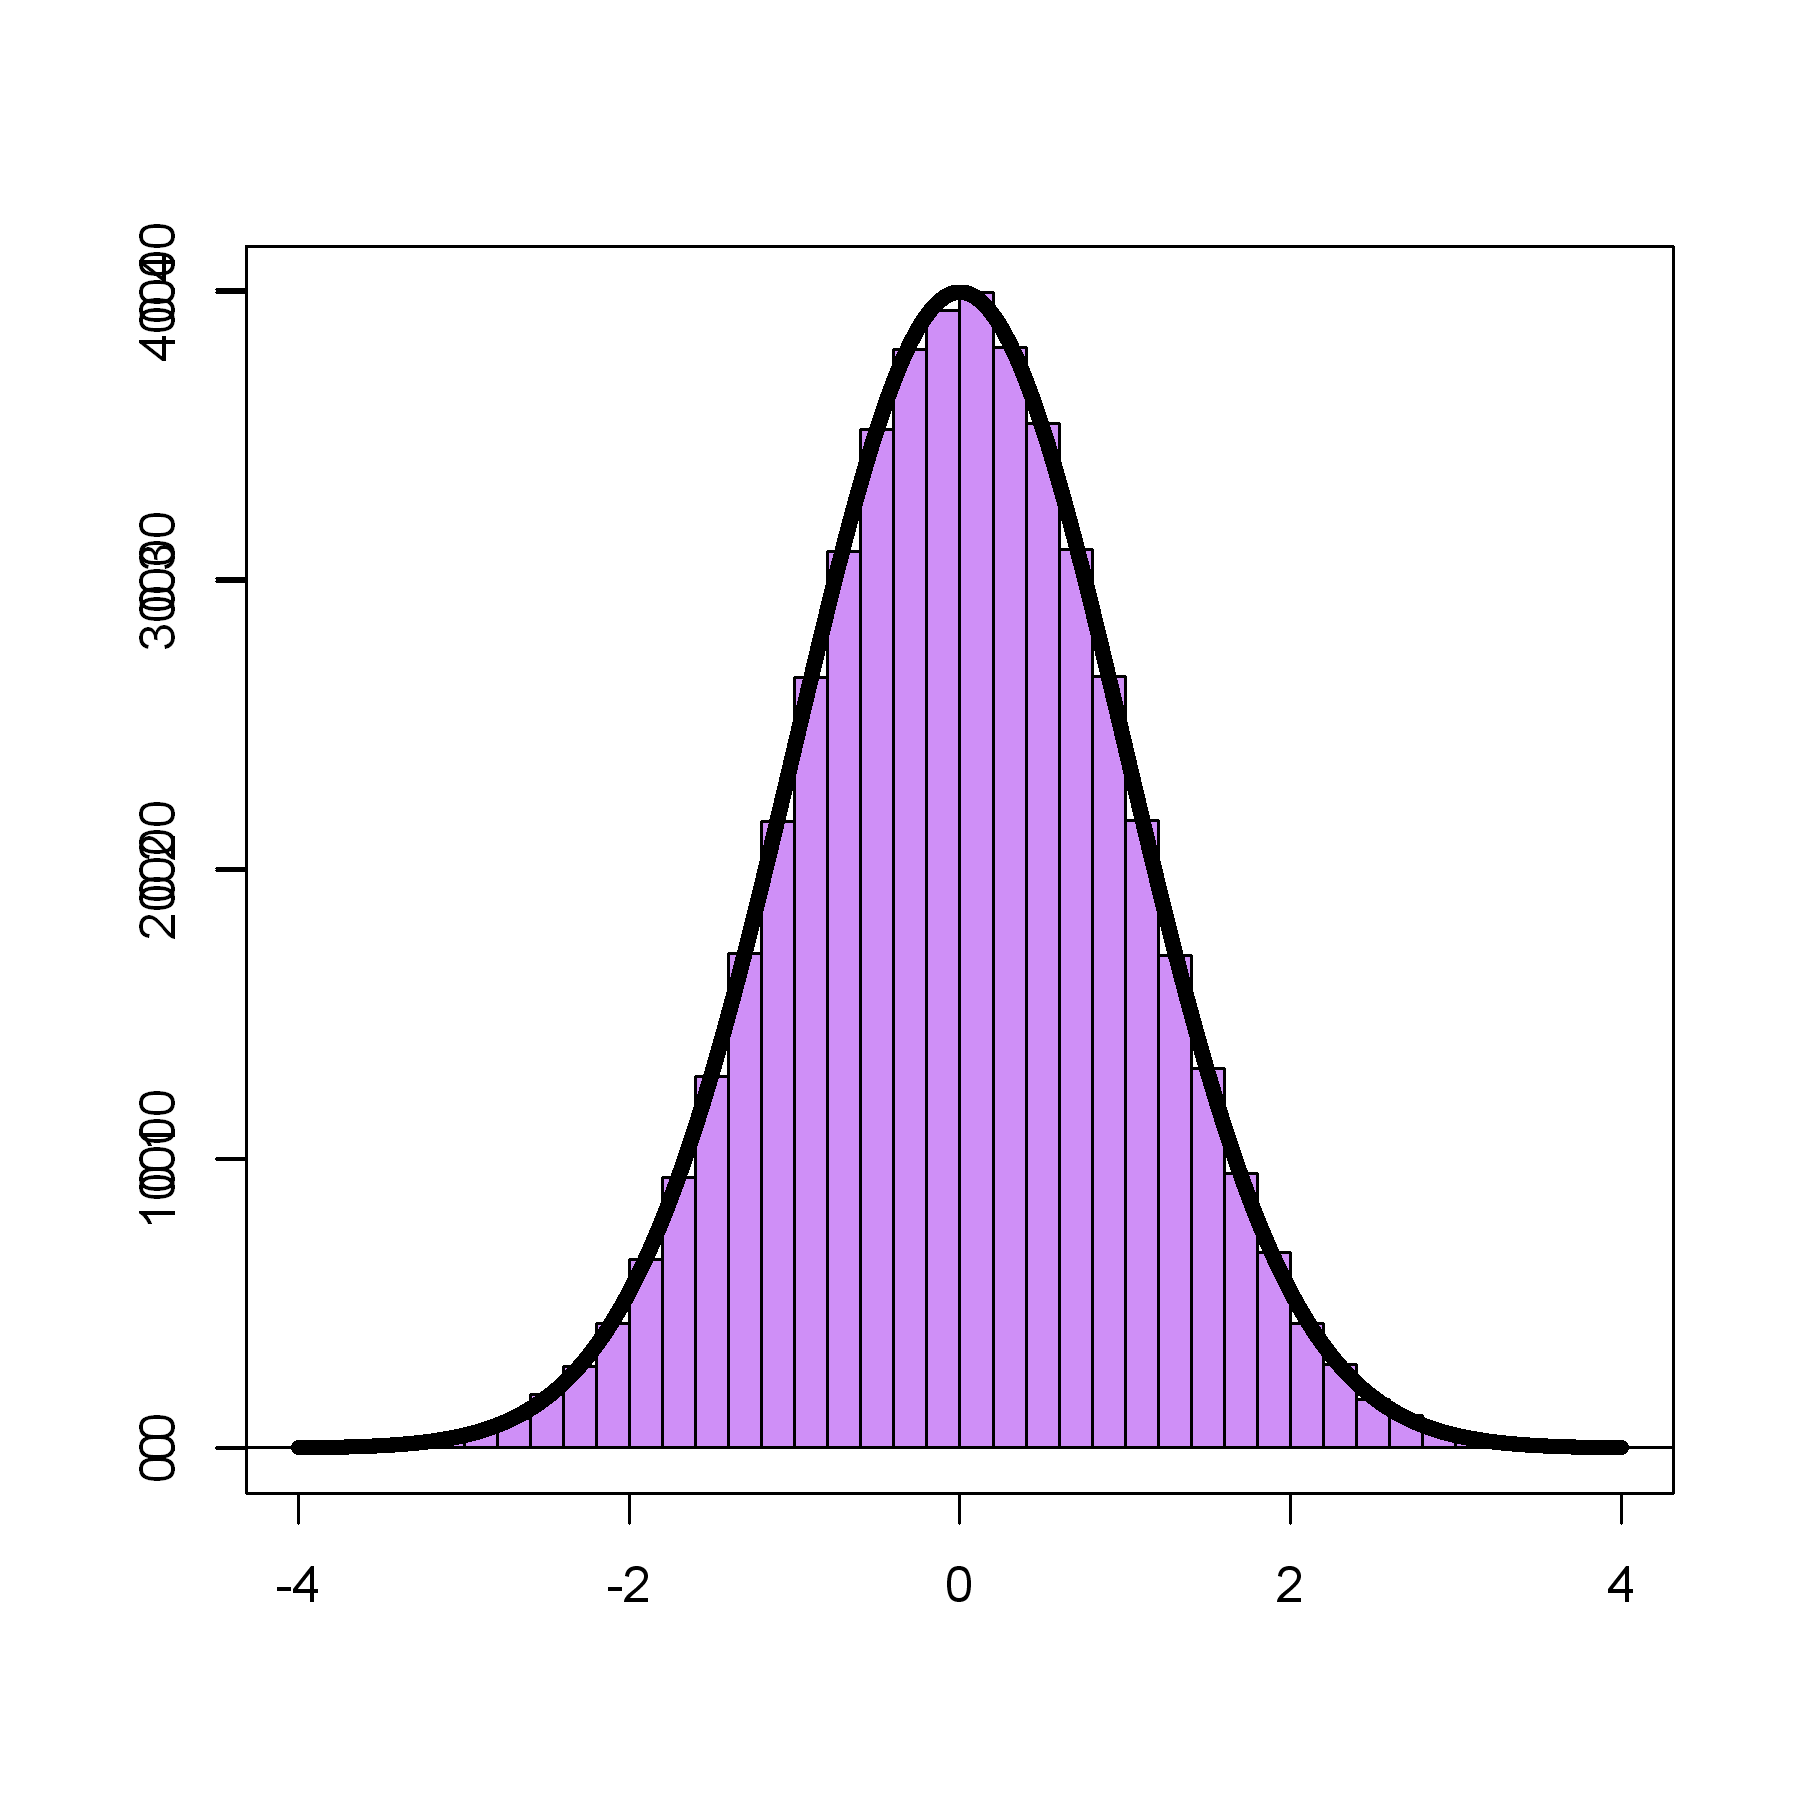

In [164]:
x = rnorm(500000)
y = rnorm(500000)

hist(x, breaks= 50, col=adjustcolor("purple",alpha=0.5), xlim=c(-4,4), ann = FALSE)
par(new = T)
k = seq(-4, 4, by = 0.00001) #실제 표준정규분포
plot(k, st_norm(k), type = 'l', lwd = 5,xlim=c(-4,4), ann = FALSE)

## Problem

-  표준정규분포에서 난수를 각각 100개 뽑아 벡터 ${\bf x, y}$에 할당하고 아래의 수식을 계산하는 코드를 작성하라.

$$
\dfrac{\sum_{i=1}^{100}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{100}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{100}(y_i-\bar{y})^2}}
$$

단, $\bar{x}=\frac{1}{100}\sum_{i=1}^{100}x_i$로 정의한다. 

### Solution

In [169]:
x=rnorm(100)
y=rnorm(100)

In [170]:
crrn = function(x, y){
    x_bar = mean(x)
    y_bar = mean(y)
    
    crrn = sum((x-x_bar)*(y-y_bar)) / (sqrt(sum((x-x_bar)**2)) * sqrt(sum((y-y_bar)**2)))
    return(crrn)
}

In [171]:
crrn(x,y) 

[1] -0.2172038

In [173]:
crrn(x,y) %>% round(6) == cor(x,y) %>% round(6)

[1] TRUE